In [28]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
%matplotlib inline
import h5py

## Read files

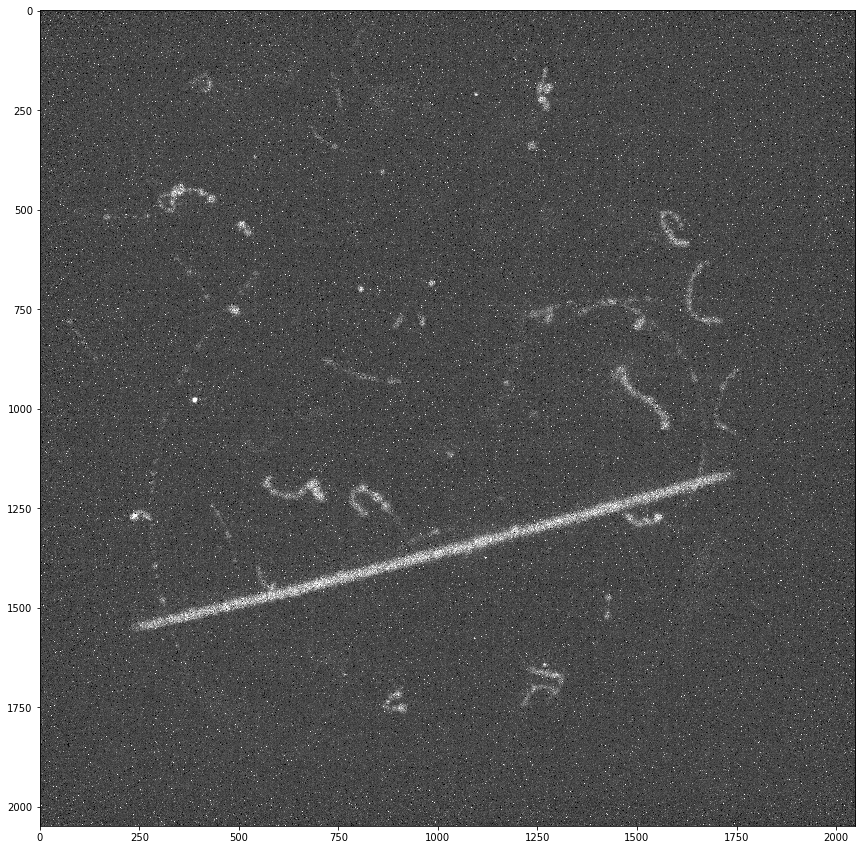

In [105]:
fig,ax = plt.subplots(1,1,figsize = (20,15))
f         = h5py.File('../data/run494-0001.h5','r')
image     = np.array(f['Image'])
#plt.imshow(image,cmap = 'gray',vmax= 135,vmin = 85)
## Saturation of high and low intensity pixels
image[image>135] = 135
image[image<85]  = 85
ax.imshow(image,cmap = 'gray')

## Calculating fft

In [106]:
fft_image   = np.fft.fft2(image)     ## calculating image fft
fft_image   = np.fft.fftshift(fft_image) ## centralizing frequencies
abs_image   = np.absolute(fft_image) ## get only abs
angle_image = np.angle(fft_image)    ## get only angle

## Show fft_images

(920, 1120)

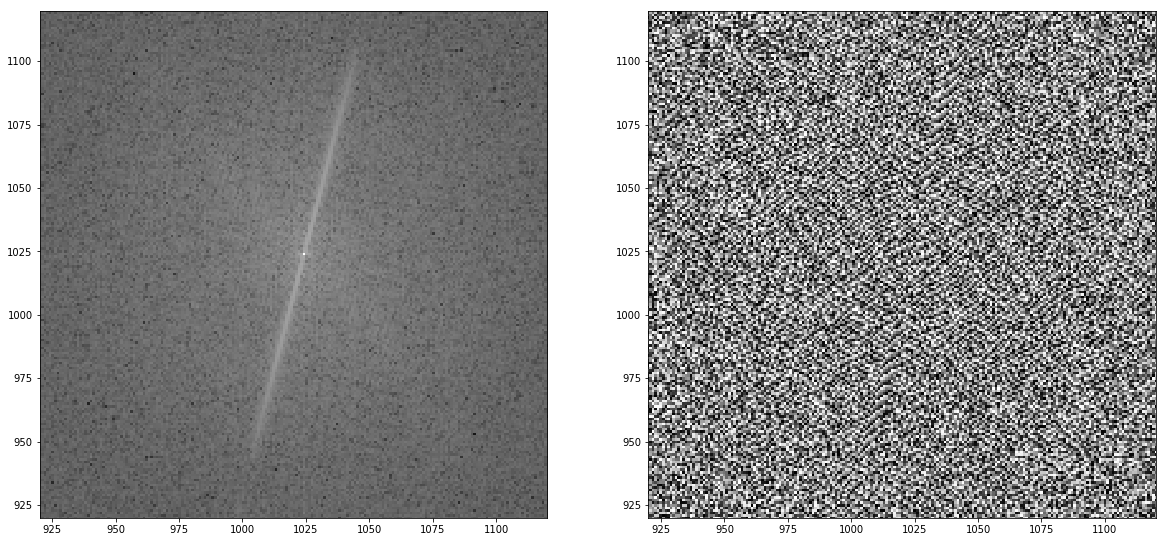

In [107]:
fig,ax = plt.subplots(1,2,figsize = (20,15))
ax[0].imshow(np.log(abs_image),cmap = 'gray')
ax[1].imshow(angle_image,cmap = 'gray')
ax[0].set_xlim([920,1120])
ax[0].set_ylim([920,1120])
ax[1].set_xlim([920,1120])
ax[1].set_ylim([920,1120])

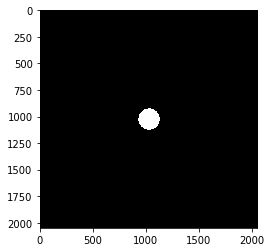

In [139]:
r = 100
filt_fft = np.zeros((2048,2048))
xx,yy    = np.meshgrid(range(0,2048),range(0,2048))
imDisk   = (((xx-1024)**2) + ((yy-1024)**2) <= r**2)
plt.imshow(imDisk,cmap = 'gray')

In [160]:
imFiltered     = abs_image*imDisk
imFilteredReal = abs_image*np.cos(angle_image)
imFilteredIm   = 1j*abs_image*np.sin(angle_image) 
imFilteredReal + imFilteredIm

array([[-6297.        +7.71160089e-13j,  1698.71533831+1.31593266e+03j,
        -3206.24424231-3.27402218e+03j, ...,
         1874.51085183+1.94730901e+03j, -3206.24424231+3.27402218e+03j,
         1698.71533831-1.31593266e+03j],
       [-5709.68785531+1.36828163e+04j, -2911.54104571+3.00905883e+03j,
         5161.46092368-7.51854030e+02j, ...,
        -8812.31820423-1.15723524e+03j,  2131.01873737-9.96663940e+03j,
        -4129.5478001 +5.54407010e+03j],
       [-3792.14984051-6.49525827e+03j,  7026.8391068 +1.96686102e+04j,
        -3622.01896594-2.60905755e+03j, ...,
         2369.61785374-3.42679594e+03j,  6954.48602871-6.91365131e+03j,
         2550.58017227-2.42747305e+03j],
       ...,
       [ 1966.3573961 +6.04054465e+03j, 15504.63455777-6.01459939e+03j,
         1407.94032759+7.48648210e+03j, ...,
         3722.39274092+1.40498024e+04j,  -966.99767806-1.02501915e+04j,
        -3353.62840903+5.20414974e+02j],
       [-3792.14984051+6.49525827e+03j,  2550.58017227+2.42747305e+0

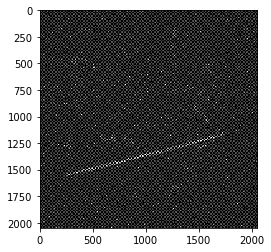

In [166]:
plt.imshow(np.real(np.fft.ifft2(imFilteredReal+imFilteredIm)),cmap = 'gray',vmax = 135,vmin = 85)